<a href="https://colab.research.google.com/github/Ratchanontt/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Test

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

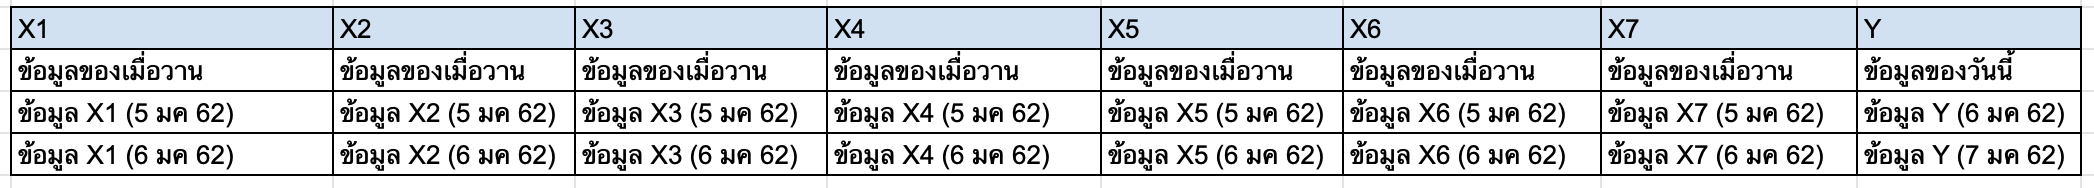

# Import Necessary Library

In [107]:
import os
import pandas as pd
import numpy as np

# Load Data

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
os.chdir('/content/drive/MyDrive/Data_BSC_DPDM23')
!pwd # เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/Data_BSC_DPDM23


In [110]:
path = os.getcwd()
files = os.listdir(path)
files

['2563.xls',
 '2563.gsheet',
 'customer_shopping_data.csv',
 'shopping.csv',
 'reduced_marketbasket.csv',
 'crx.names',
 'crx.data',
 'อุตุ']

## Test Loading

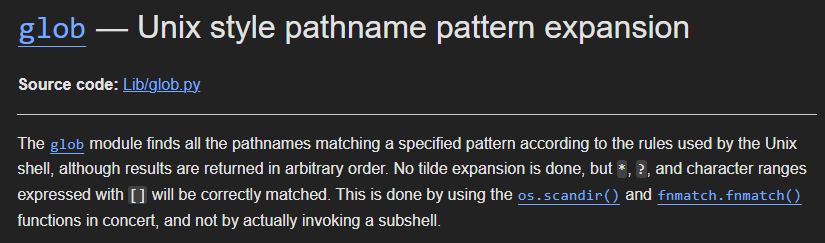

In [111]:
import glob

Airpress = '/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)'
excel_files = glob.glob(Airpress + '/*.xlsx')
all_province = []

for file in excel_files:
    df = pd.read_excel(file, skiprows=3)
    all_province.append(df)

combined_df = pd.concat(all_province, ignore_index=True)

In [112]:
combined_df

,ที่,สถานี,เดือน/ปี,วันที่,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,เฉลี่ย
0,NaN,NaN,NaT,1.00,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.00,28.00,29,30,31,NaN
1,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
2,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
3,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
4,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,48,352201-หนองคาย จ.หนองคาย,2021-10-01,1008.12,1008.74,1008.64,1008.16,1007.42,1005.93,1004.61,...,1015.21,1015.08,1013.52,1012.33,1012.16,1012.33,1013.04,1013.26,1012.96,1009.382903
276,49,352201-หนองคาย จ.หนองคาย,2021-11-01,1013.23,1013.04,1012.50,1011.41,1009.71,1007.97,1007.80,...,1013.18,1014.70,1014.53,1014.41,1015.51,1014.45,1013.37,1013.98,-,1012.167000
277,50,352201-หนองคาย จ.หนองคาย,2021-12-01,1015.80,1017.00,1018.68,1018.13,1017.43,1016.91,1016.72,...,1012.63,1012.30,1013.87,1015.64,1017.06,1017.58,1016.4,1017.83,1018.39,1015.712903
278,1,352201-หนองคาย จ.หนองคาย,2022-01-01,1017.75,1016.89,1015.26,1014.98,1013.66,1014.12,1014.99,...,1010.66,1010.19,1010.22,1010.70,1010.80,1010.52,1008.55,1007.99,1008.91,1012.889032


In [113]:
# combined_df.to_excel('combined_data.xlsx', index=False)

วิธีนี้ไม่เหมาะ เนื่องจาก ข้อมูลใน Column 'สถานี' มันผิดหรือก็คือในชีทจ.ขอนแก่น แต่ในข้อมูลเป็นจ.หนองคาย (ไม่ได้มีการบอกว่ามาจากจังหวัดไหน)

## Air Pressure: ความกดอากาศ (เปอร์เซ็นต์)

In [171]:
Air_Pressure_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
Air_Pressure_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
Air_Pressure_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
Air_Pressure_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
Air_Pressure_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

In [115]:
Air_Pressure_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


## Relative Humidity: ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)


In [172]:
Relative_Humidity_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
Relative_Humidity_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
Relative_Humidity_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
Relative_Humidity_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
Relative_Humidity_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

In [173]:
Relative_Humidity_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


## Wind Speed: ความเร็วลม (นอต)

In [174]:
Wind_Speed_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
Wind_Speed_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
Wind_Speed_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
Wind_Speed_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
Wind_Speed_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)

## Number of Clouds: จำนวนเมฆ (10ส่วน)


In [176]:
Num_Clouds_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
Num_Clouds_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
Num_Clouds_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
Num_Clouds_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
Num_Clouds_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)

## Rainfall: ปริมาณฝน (มิลลิเมตร)

In [177]:
Rainfall_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header = 4)
Rainfall_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header = 4)
Rainfall_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header = 4)
Rainfall_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header = 4)
Rainfall_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header = 4)

## Dew Point Temperature: อุณหภูมิจุดน้ำค้าง (เซลเซียส)


In [178]:
Dew_Point_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
Dew_Point_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
Dew_Point_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header = 4)
Dew_Point_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
Dew_Point_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header = 4)

## Minimum Degree: อุณหภูมิต่ำสุด (เซลเซียส)


In [179]:
Min_Degree_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
Min_Degree_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
Min_Degree_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header = 4)
Min_Degree_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
Min_Degree_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header = 4)

## Dry Bulb: อุณหภูมิตุ้มแห้ง (เซลเซียส)


 อุณหภูมิกระเปาะแห้ง (Dry Bulb) คืออุณหภูมิที่อ่านจากเทอร์โมมิเตอร์ที่กระเปาะแห้ง ในการวัดจะต้องให้กระเปาะอยู่ในอากาศที่ถ่ายเทสะดวก

In [180]:
Dry_Bulb_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
Dry_Bulb_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
Dry_Bulb_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header = 4)
Dry_Bulb_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
Dry_Bulb_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header = 4)

# Cleaning Data

## Change Title of Column

สร้าง list สำหรับทำฟังก์ชันวนลูปในแต่ละลักษณะอากาศ โดยเก็บอย่างละ 5 จังหวัด

In [181]:
df_air_list = [Air_Pressure_KhonKaen, Air_Pressure_NakhonPhanom, Air_Pressure_SakonNakhon, Air_Pressure_NongKhai, Air_Pressure_Loei]
df_humidity_list = [Relative_Humidity_KhonKaen, Relative_Humidity_NakhonPhanom, Relative_Humidity_SakonNakhon, Relative_Humidity_NongKhai, Relative_Humidity_Loei]
df_wind_list = [Wind_Speed_KhonKaen, Wind_Speed_NakhonPhanom, Wind_Speed_SakonNakhon, Wind_Speed_NongKhai, Wind_Speed_Loei]
df_cloud_list = [Num_Clouds_KhonKaen, Num_Clouds_NakhonPhanom, Num_Clouds_SakonNakhon, Num_Clouds_NongKhai, Num_Clouds_Loei]
df_rain_list = [Rainfall_KhonKaen, Rainfall_NakhonPhanom, Rainfall_SakonNakhon, Rainfall_NongKhai, Rainfall_Loei]
df_dew_list = [Dew_Point_KhonKaen, Dew_Point_NakhonPhanom, Dew_Point_SakonNakhon, Dew_Point_NongKhai, Dew_Point_Loei]
df_mindegree_list = [Min_Degree_KhonKaen, Min_Degree_NakhonPhanom, Min_Degree_SakonNakhon, Min_Degree_NongKhai, Min_Degree_Loei]
df_bulb_list = [Dry_Bulb_KhonKaen, Dry_Bulb_NakhonPhanom, Dry_Bulb_SakonNakhon, Dry_Bulb_NongKhai, Dry_Bulb_Loei]

In [182]:
def rename_col(df):
  df.rename(columns={'Unnamed: 0': 'ลำดับ', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'ค่าเฉลี่ย'}, inplace=True)
  return df

# ไม่ต้องสนใจ วันที่ ใน col 'Unnamed: 2': 'เดือน/ปี' เพราะ เป็น setting จาก โปรแกรม excel (วันที่ทั้งหมดใน col จะเป็นวันที่1 แค่คนละเดือน-ปี)

In [183]:
df_dict = {
  "ความกดอากาศ": df_air_list,
  "ความชื้นสัมพัทธ์": df_humidity_list,
  "ความเร็วลม": df_wind_list,
  "จำนวนเมฆ": df_cloud_list,
  "ปริมาณฝน": df_rain_list,
  "อุณหภูมิจุดน้ำค้าง": df_dew_list,
  "อุณหภูมิต่ำสุด": df_mindegree_list,
  "อุณหภูมิต่ำสุด": df_bulb_list
}

for category, df_list in df_dict.items():
    for df in df_list:
        rename_col(df)

In [184]:
Air_Pressure_Loei.head()

,ลำดับ,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


In [127]:
Relative_Humidity_Loei.head()

,ลำดับ,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


In [128]:
Dry_Bulb_Loei.head()

,ลำดับ,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


## Drop Column 'สถานี'

In [185]:
def drop_column(df):

  df.drop('สถานี', axis=1, inplace = True)
  return df
# ไม่จำเป็นต้องนำไปวิเคราะห์ เนื่องจาก ข้อมูลจังหวัด ในบางไฟล์คอลัมน์ 'สถานี' กับชื่อไฟล์ ไม่ตรงกัน

In [186]:
for category, df_list in df_dict.items():
    for df in df_list:
        drop_column(df)

In [187]:
Air_Pressure_NakhonPhanom.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [188]:
Dew_Point_NakhonPhanom.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,22.2,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,20.6,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,17.2,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,13.9,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,16.4,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


## Check & Fix Missing value

In [132]:
Air_Pressure_KhonKaen.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [133]:
Air_Pressure_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

### แทนที่ `-` ด้วย `NaN`
เนื่องจาก Missing value ของชุดข้อมูลแทนเป็นค่า `- `

In [ ]:
def replace_nan(df):

  df.replace('-', np.NaN, inplace = True)
  return df

In [ ]:
#ความกดอากาศ
for df in df_air_list:
  replace_nan(df)

#ความชื้นสัมพัทธ์
for df in df_humidity_list:
  replace_nan(df)

#ความเร็วลม
for df in df_wind_list:
  replace_nan(df)

#จำนวนเมฆ
for df in df_cloud_list:
  replace_nan(df)

# อุณหภูมิจุดน้ำค้าง
for df in df_dew_list:
  replace_nan(df)

#อุณหภูมิต่ำสุด
for df in df_mindegree_list:
  replace_nan(df)

#อุณหภูมิตุ้มแห้ง
for df in df_bulb_list:
  replace_nan(df)

จาก Rainfall หรือปริมาณน้ำฝนมีค่าเป็น `-` และ `T`

เกณฑ์การตรวจวัดฝนมีดังนี้

* ฝนวัดจำนวนไม่ได ้(Trace)          มีปริมาณฝนไม่ถึง 0.1 มิลลิเมตร
* ฝนเล็กน้อย (Light rain)               มีปริมาณฝนตั้งแต่ 0.1 มิลลิเมตร 10.0 มิลลิเมตร
* ฝนปานกลาง (Moderate rain)     มีปริมาณฝนตั้งแต่ 10.1 มิลลิเมตร 35.0 มิลลิเมตร
* ฝนหนัก (Heavy rain)                 มีปริมาณฝนตั้งแต่ 35.1 มิลลิเมตร 90.0 มิลลิเมตร
* ฝนหนักมาก (Very heavy rain)    มีปริมาณฝนตั้งแต่ 90.1 มิลลิเมตรขึ้นไป

อ้างอิง: http://www.arcims.tmd.go.th/dailydata/DetailDailyRain.html

In [137]:
#ปริมาณฝน
for df in df_rain_list:
  replace_nan(df)

In [138]:
Rainfall_SakonNakhon.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,0.3,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,0,...,0.0,0,0.0,0,0,0,0.0,0,NaN,2.8
2,3,2011-12-01,0.0,0.0,0.0,0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,2012-01-01,0.0,0.0,0.0,0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,2012-02-01,0.0,0.0,0.0,0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,NaN,NaN,6


จากฝนที่มีปริมาณไม่ถึง 0.1 มิลลิเมตร แสดงว่า วัดจำนวนไม่ได้ (Trace)

In [139]:
# 0.09 มีค่าใกล้เคียงกับ 0.1 มากที่สุด
for df in df_rain_list:
  df.replace('T', 0.09, inplace = True)

In [140]:
Rainfall_SakonNakhon.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,84.8,28.1,0.0,0.09,5.50,0.30,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,2011-11-01,0.0,0.0,0.0,0.00,0.09,0.09,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.8
2,3,2011-12-01,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,2012-01-01,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,2012-02-01,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,NaN,NaN,6.0


### เพิ่ม Row ในส่วนที่หายไปให้เท่ากัน

Dew_Point (อุณหภูมิจุดน้ำค้าง) และ Dry_Bulb (อุณหภูมิตุ้มแห้ง) มี 50 แถว ในขณะที่ลักษณะอื่นๆ มี 55 แถว ก็คือ Row หายไป 5 row


In [146]:
Rainfall_Loei.shape

(55, 34)

In [149]:
Dew_Point_Loei.shape

(50, 34)

In [150]:
Dry_Bulb_Loei.shape

(50, 34)

จาก Column ที่เกินมาใน `[16, 35]` ของไฟล์ จำนวนเมฆ(10ส่วน) จ.เลย

In [ ]:
Num_Clouds_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Num_Clouds_Loei = Num_Clouds_Loei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [ ]:
Num_Clouds_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2
